# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [2]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
df['數學']

0     15
1     10
2      8
3      8
4     14
      ..
95     9
96    14
97    11
98     8
99    12
Name: 數學, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [6]:
df.數學

0     15
1     10
2      8
3      8
4     14
      ..
95     9
96    14
97    11
98     8
99    12
Name: 數學, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

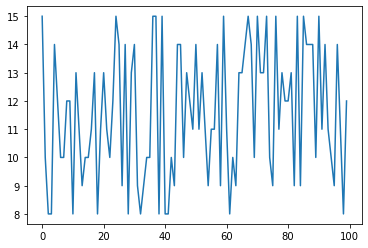

In [7]:
df.數學.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

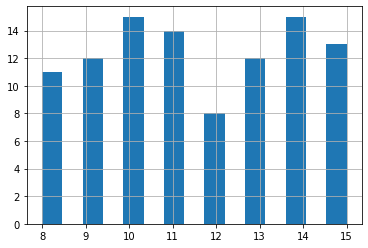

In [8]:
df.數學.hist(bins = 15)

## 3 一些基本的資料分析

算平均。

In [9]:
df.數學.mean()

11.57

算標準差。

In [10]:
df.數學.std()

2.310516143307562

不如就該算的都幫我們算算...

In [11]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [12]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [13]:
df.國文.corr(df.英文)

0.16015801596684315

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [14]:
df["總級分"] = df.sum(axis = 1)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [17]:
df["加權"] = df.國文+df.英文*2+df.數學

In [20]:
df.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,44
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,51
3,陳上紫,10,10,8,9,14,51,38
4,崔靜成,13,12,14,12,13,64,51
5,張雅岳,13,12,12,12,8,57,49
6,梁俊翔,11,13,10,10,14,58,47
7,林金鳳,8,9,10,10,8,45,36
8,許協旺,9,9,12,10,10,50,39
9,郭雅惠,10,15,12,11,9,57,52


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [19]:
df.sort_values(by = "總級分",ascending = False).head(15)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,55
12,李正偉,11,15,11,14,15,66,52
54,陳怡潔,15,15,9,15,11,65,54
25,蔡亦瑄,13,13,14,13,12,65,53
57,胡淳茜,12,15,14,13,11,65,56
37,曾怡君,11,12,15,13,14,65,50
48,陳怡婷,15,14,12,9,15,65,55
64,俞志峰,9,14,13,14,15,65,50
83,李士賢,10,14,15,13,13,65,53
87,趙偉希,10,13,14,13,15,65,50


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [23]:
df.sort_values(by=["加權","總級分"],ascending = False).head(15)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,56
80,施雅鈴,13,15,12,13,13,66,55
48,陳怡婷,15,14,12,9,15,65,55
54,陳怡潔,15,15,9,15,11,65,54
65,謝雅琳,13,14,13,12,9,61,54
25,蔡亦瑄,13,13,14,13,12,65,53
83,李士賢,10,14,15,13,13,65,53
36,詹威德,12,13,15,10,14,64,53
44,童心怡,13,13,14,8,13,61,53


In [24]:
df2 = df.sort_values(by=["加權","總級分"],ascending = False)

### 【重點】重設 index

In [27]:
df2.index = range(1,101)
df2.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,56
3,施雅鈴,13,15,12,13,13,66,55
4,陳怡婷,15,14,12,9,15,65,55
5,陳怡潔,15,15,9,15,11,65,54
6,謝雅琳,13,14,13,12,9,61,54
7,蔡亦瑄,13,13,14,13,12,65,53
8,李士賢,10,14,15,13,13,65,53
9,詹威德,12,13,15,10,14,64,53
10,童心怡,13,13,14,8,13,61,53


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [29]:
df2[df2.英文 == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,56
3,施雅鈴,13,15,12,13,13,66,55
5,陳怡潔,15,15,9,15,11,65,54
11,王佳蓉,14,15,9,9,8,55,53
12,李正偉,11,15,11,14,15,66,52
15,郭雅惠,10,15,12,11,9,57,52
17,黃淑婷,13,15,8,11,14,61,51
18,林士茜,12,15,9,9,13,58,51
29,林意珍,9,15,11,13,9,57,50


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [30]:
df2[(df2.英文 == 15) & (df2.數學 == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [31]:
df3 = df2.drop("總級分",axis = 1)
df3

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,56
3,施雅鈴,13,15,12,13,13,55
4,陳怡婷,15,14,12,9,15,55
5,陳怡潔,15,15,9,15,11,54
...,...,...,...,...,...,...,...
96,黃奕霞,9,8,11,13,8,36
97,林金鳳,8,9,10,10,8,36
98,胡凱琳,10,8,9,9,15,35
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [32]:
df2.drop("總級分",axis = 1,inplace = True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,56
3,施雅鈴,13,15,12,13,13,55
4,陳怡婷,15,14,12,9,15,55
5,陳怡潔,15,15,9,15,11,54
...,...,...,...,...,...,...,...
96,黃奕霞,9,8,11,13,8,36
97,林金鳳,8,9,10,10,8,36
98,胡凱琳,10,8,9,9,15,35
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [33]:
df2.drop(2).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
3,施雅鈴,13,15,12,13,13,55
4,陳怡婷,15,14,12,9,15,55
5,陳怡潔,15,15,9,15,11,54
6,謝雅琳,13,14,13,12,9,54


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [37]:
df2[df2.姓名 == "吳志遠"]

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58


In [39]:
df2.drop(df2[df2.姓名 == "吳志遠"].index)


,姓名,國文,英文,數學,自然,社會,加權
2,胡淳茜,12,15,14,13,11,56
3,施雅鈴,13,15,12,13,13,55
4,陳怡婷,15,14,12,9,15,55
5,陳怡潔,15,15,9,15,11,54
6,謝雅琳,13,14,13,12,9,54
...,...,...,...,...,...,...,...
96,黃奕霞,9,8,11,13,8,36
97,林金鳳,8,9,10,10,8,36
98,胡凱琳,10,8,9,9,15,35
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [60]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [46]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-21,27.997499,27.502501,27.530001,27.932501,117058400.0,26.292353
2016-11-22,28.105000,27.850000,27.987499,27.950001,103862000.0,26.308828
2016-11-23,27.877501,27.582500,27.840000,27.807501,109705600.0,26.174694
2016-11-25,27.967501,27.737499,27.782499,27.947500,45903600.0,26.306475
2016-11-28,28.117500,27.847500,27.857500,27.892500,108776000.0,26.254700


#### 只要最後 300 個交易日!

In [61]:
df = df[-50:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.752899
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.332062
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,147.904129
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,148.812805
2021-09-16,148.970001,147.220001,148.440002,148.789993,68034100.0,148.573151
2021-09-17,148.820007,145.759995,148.820007,146.059998,129868800.0,145.847137
2021-09-20,144.839996,141.270004,143.800003,142.940002,123478900.0,142.731689
2021-09-21,144.600006,142.779999,143.929993,143.429993,75834000.0,143.220963
2021-09-22,146.429993,143.699997,144.449997,145.850006,76404300.0,145.637451


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

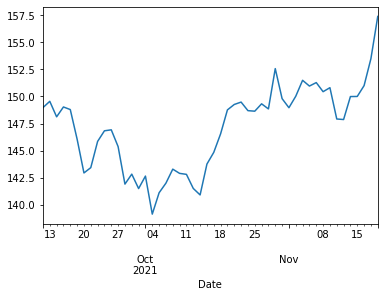

In [63]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

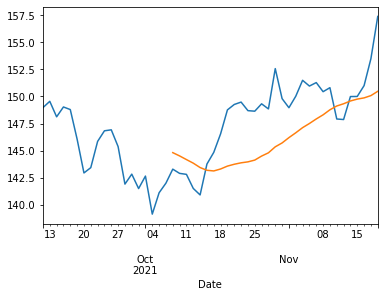

In [64]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

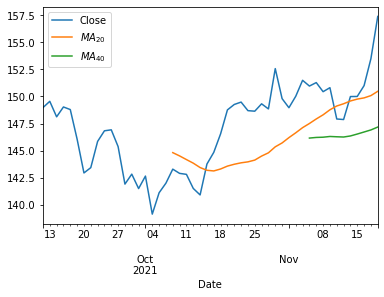

In [66]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(40).mean().plot(label="$MA_{40}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [67]:
close = df.Close.values
len(close)

50

In [68]:
x = close[:-1]
x

array([148.97000122, 149.55000305, 148.11999512, 149.02999878,
       148.78999329, 146.05999756, 142.94000244, 143.42999268,
       145.8500061 , 146.83000183, 146.91999817, 145.36999512,
       141.91000366, 142.83000183, 141.5       , 142.6499939 ,
       139.13999939, 141.11000061, 142.        , 143.28999329,
       142.8999939 , 142.80999756, 141.50999451, 140.91000366,
       143.75999451, 144.83999634, 146.55000305, 148.75999451,
       149.25999451, 149.47999573, 148.69000244, 148.63999939,
       149.32000732, 148.8500061 , 152.57000732, 149.80000305,
       148.96000671, 150.02000427, 151.49000549, 150.96000671,
       151.27999878, 150.44000244, 150.80999756, 147.91999817,
       147.86999512, 149.99000549, 150.        , 151.        ,
       153.49000549])

In [69]:
y = close[1:]
y

array([149.55000305, 148.11999512, 149.02999878, 148.78999329,
       146.05999756, 142.94000244, 143.42999268, 145.8500061 ,
       146.83000183, 146.91999817, 145.36999512, 141.91000366,
       142.83000183, 141.5       , 142.6499939 , 139.13999939,
       141.11000061, 142.        , 143.28999329, 142.8999939 ,
       142.80999756, 141.50999451, 140.91000366, 143.75999451,
       144.83999634, 146.55000305, 148.75999451, 149.25999451,
       149.47999573, 148.69000244, 148.63999939, 149.32000732,
       148.8500061 , 152.57000732, 149.80000305, 148.96000671,
       150.02000427, 151.49000549, 150.96000671, 151.27999878,
       150.44000244, 150.80999756, 147.91999817, 147.86999512,
       149.99000549, 150.        , 151.        , 153.49000549,
       157.38499451])

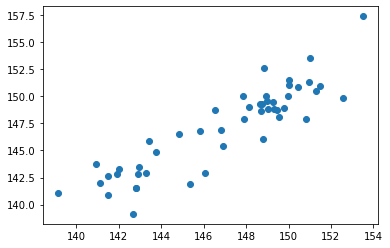

In [72]:
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [71]:
mydata = np.random.randn(4,3)

In [73]:
mydata

array([[ 0.29830325,  0.09640093,  0.84875771],
       [ 1.46087116,  0.23844184,  1.39529675],
       [ 0.77293945,  0.06633313,  0.40936873],
       [ 0.84642709,  1.04743298, -0.69093609]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [74]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [75]:
df2

,A,B,C
0,0.298303,0.096401,0.848758
1,1.460871,0.238442,1.395297
2,0.772939,0.066333,0.409369
3,0.846427,1.047433,-0.690936


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [76]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [77]:
df3

,A,B,C
0,-0.791432,0.678020,-0.786391
1,1.141286,0.022633,-0.798120
2,-2.301219,-0.629872,-1.239984


In [78]:
df4 = pd.concat([df2,df3],axis = 0)

In [79]:
df4

,A,B,C
0,0.298303,0.096401,0.848758
1,1.460871,0.238442,1.395297
2,0.772939,0.066333,0.409369
3,0.846427,1.047433,-0.690936
0,-0.791432,0.678020,-0.786391
1,1.141286,0.022633,-0.798120
2,-2.301219,-0.629872,-1.239984


前面我們弄得亂七八糟的 index 重設一下。

In [80]:
df4.index = range(7)

In [81]:
df4

,A,B,C
0,0.298303,0.096401,0.848758
1,1.460871,0.238442,1.395297
2,0.772939,0.066333,0.409369
3,0.846427,1.047433,-0.690936
4,-0.791432,0.678020,-0.786391
5,1.141286,0.022633,-0.798120
6,-2.301219,-0.629872,-1.239984


#### 横向的貼

In [83]:
df5 = pd.concat([df2,df3],axis = 1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [84]:
df5

,A,B,C,A,B,C
0,0.298303,0.096401,0.848758,-0.791432,0.678020,-0.786391
1,1.460871,0.238442,1.395297,1.141286,0.022633,-0.798120
2,0.772939,0.066333,0.409369,-2.301219,-0.629872,-1.239984
3,0.846427,1.047433,-0.690936,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [117]:
df_name = pd.read_csv('data/names.csv',names = ['姓名'])

In [118]:
df_name

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [88]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [127]:
df_grades.to_csv('data/grade2.csv')

In [125]:
df_grades

,國文,英文,數學,社會,自然
0,8,7,12,7,7
1,6,8,6,7,9
2,15,15,13,6,15
3,15,9,10,7,10
4,15,9,14,14,15
...,...,...,...,...,...
95,8,11,15,7,7
96,12,10,7,15,11
97,14,12,9,9,11
98,6,14,11,15,14


In [123]:
df_name = pd.read_csv('data/names.csv')
df_grades

,國文,英文,數學,社會,自然
0,8,7,12,7,7
1,6,8,6,7,9
2,15,15,13,6,15
3,15,9,10,7,10
4,15,9,14,14,15
...,...,...,...,...,...
95,8,11,15,7,7
96,12,10,7,15,11
97,14,12,9,9,11
98,6,14,11,15,14


In [128]:
df_grade2= pd.read_csv('data/grade2.csv')
df_grade2

,Unnamed: 0,國文,英文,數學,社會,自然
0,0,8,7,12,7,7
1,1,6,8,6,7,9
2,2,15,15,13,6,15
3,3,15,9,10,7,10
4,4,15,9,14,14,15
...,...,...,...,...,...,...
95,95,8,11,15,7,7
96,96,12,10,7,15,11
97,97,14,12,9,9,11
98,98,6,14,11,15,14


In [121]:
df_n = pd.concat([df_name,df_grades],axis = 1)

In [122]:
df_n

,羅雅慧,國文,英文,數學,社會,自然
0,王紹尹,8,7,12,7,7
1,黃季坤,6,8,6,7,9
2,許正書,15,15,13,6,15
3,張鈞蓮,15,9,10,7,10
4,陳緯陽,15,9,14,14,15
...,...,...,...,...,...,...
95,曾桂甫,8,11,15,7,7
96,林欣怡,12,10,7,15,11
97,林佳霖,14,12,9,9,11
98,胡筱芸,6,14,11,15,14
